In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def system(t, x):
    return np.array([        
        (1 / 1j) * 0.5 * x[1] * np.exp(-1j * t * 200),
        (1 / 1j) * 0.5 * x[0] * np.exp(+1j * t * 200)
    ])

In [3]:
x0 = [0, 1]
t = np.linspace(0, 0.25 * np.pi, 1000)

In [4]:
solver = integrate.complex_ode(system) \
                  .set_integrator('vode', method='bdf') \
                  .set_initial_value(x0, 0)

In [5]:
x = []
dt = t[1] - t[0]
while solver.successful() and solver.t < t.max() + dt:
    solver.integrate(solver.t + dt)
    x.append(solver.y)

In [6]:
x = np.array(x)

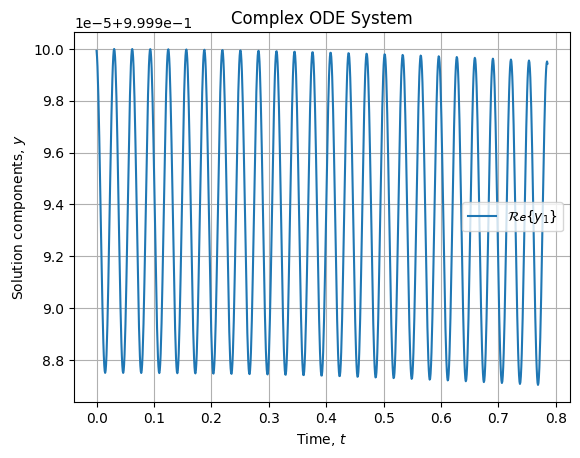

In [10]:
fig, axe = plt.subplots()
axe.plot(t, np.real(x[:,1]))
#axe.plot(t, np.imag(x))
axe.set_title("Complex ODE System")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Solution components, $y$")
axe.legend([
    #r"$\mathcal{Re}\{y_0\}$",
    r"$\mathcal{Re}\{y_1\}$",
    r"$\mathcal{Im}\{y_0\}$",
    r"$\mathcal{Im}\{y_1\}$"
])
axe.grid()